In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
import pickle


In [3]:
#Data Collection and Analysis

insurance_dataset=pd.read_csv('insurance.csv')


In [4]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
insurance_dataset.shape

(1338, 7)

In [6]:
insurance_dataset.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


In [7]:
#Getting information about dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:

-Sex
-Smoker
-Region

In [8]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#Analysis part 
#statistical mesaure of dataset

insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


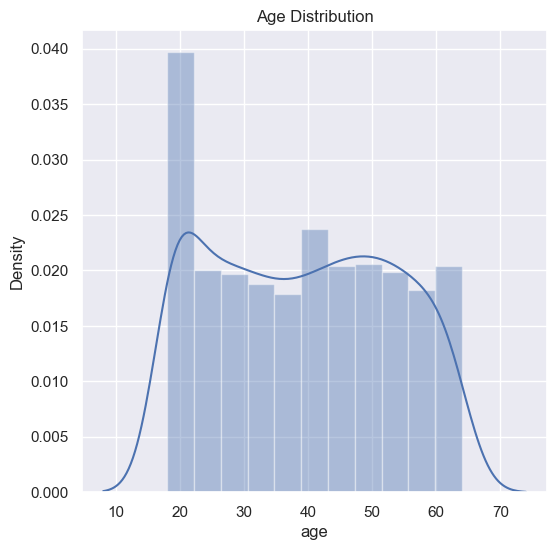

In [10]:
#distribution of age value

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

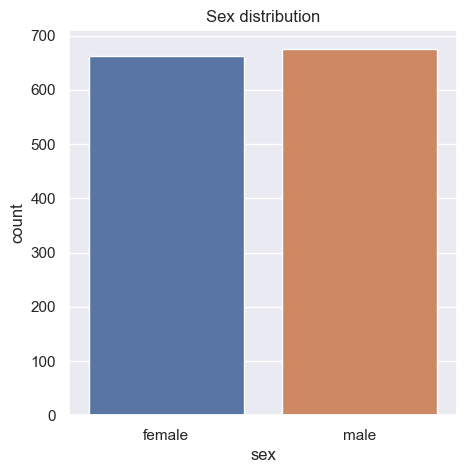

In [11]:
#for gender column

plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex distribution')
plt.show()

In [12]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [13]:
insurance_dataset['region'].value_counts()


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


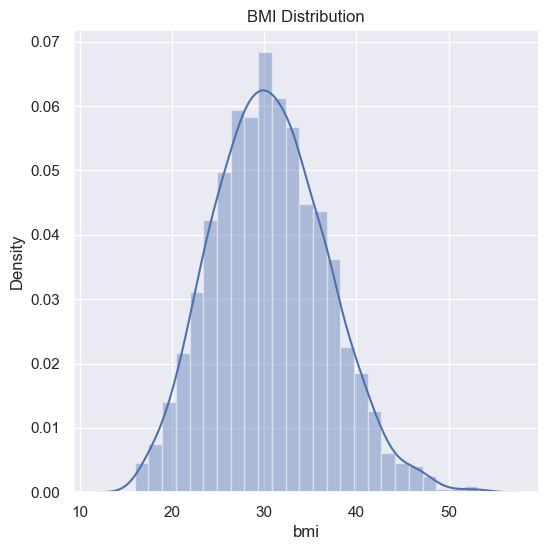

In [14]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

In [15]:
#Normal BMI Range ---->18.5 to 24.9
#IF < 18.5 = underweight
#If >24.9 =overweight

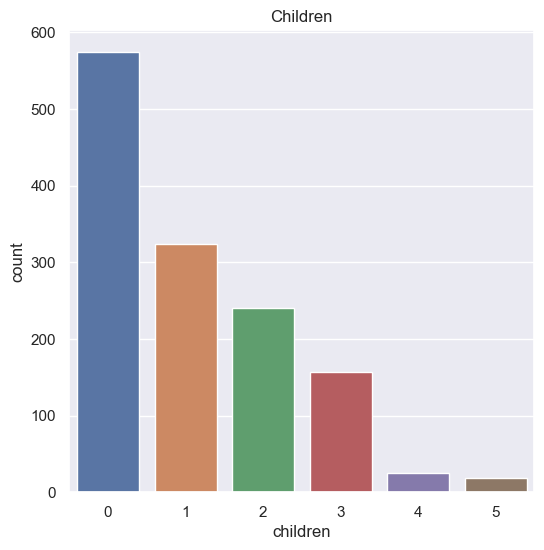

In [16]:
#Children

plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children')
plt.show()

In [17]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

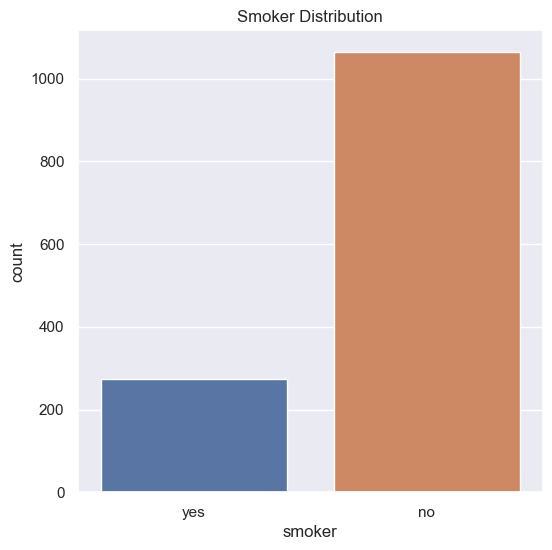

In [18]:
#Smoker
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker Distribution')
plt.show()

In [19]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [20]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

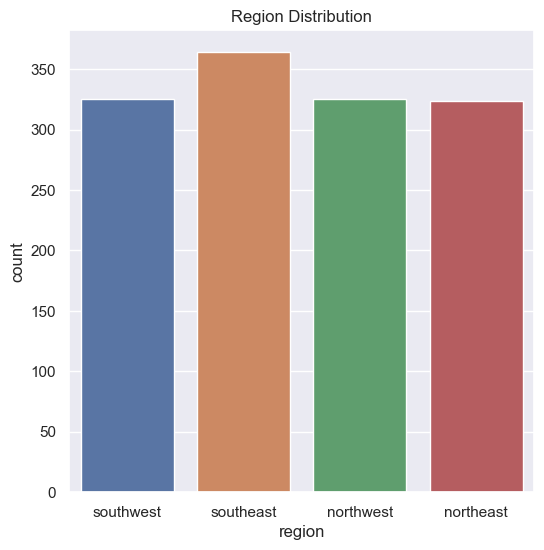

In [21]:
#Region
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region Distribution')
plt.show()

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


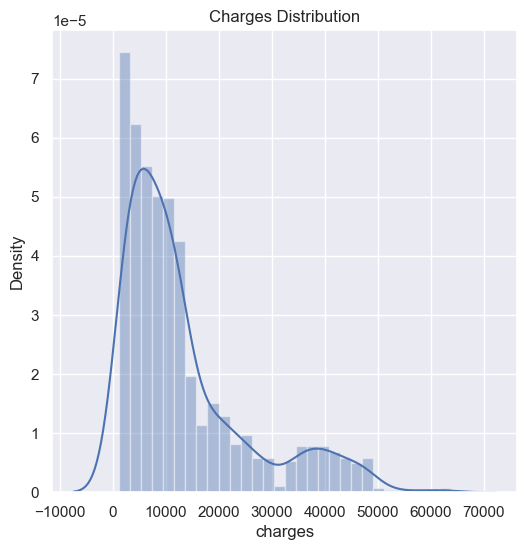

In [22]:
#distribution of charges
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre-processing


In [23]:
#Encoding the categorical features

In [24]:
#For sex

insurance_dataset.replace({'sex':{'male':1,'female':0}},inplace=True)

#For smoker

insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#For reigon

insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [25]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,0,1725.55230
2,28,1,33.000,3,1,0,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,3,10600.54830
1334,18,0,31.920,0,1,2,2205.98080
1335,18,0,36.850,0,1,0,1629.83350
1336,21,0,25.800,0,1,1,2007.94500


In [26]:
#splitting the features and the target


In [27]:
X=insurance_dataset.drop(columns='charges',axis=1)
Y=insurance_dataset['charges']

In [28]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,1
1,18,1,33.770,1,1,0
2,28,1,33.000,3,1,0
3,33,1,22.705,0,1,3
4,32,1,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,3
1334,18,0,31.920,0,1,2
1335,18,0,36.850,0,1,0
1336,21,0,25.800,0,1,1


In [29]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [30]:
#Splitting the data into training data and testing data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [31]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [32]:
#Model Training


LINEAR REGRESSION

In [33]:
regressor=LinearRegression()

In [34]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [35]:
#Model Evaluation
#prediction on training data

training_data_prediction=regressor.predict(X_train)

In [36]:
#R squared value

r2_train = metrics.r2_score(Y_train,training_data_prediction)
r2_train


0.751505643411174

In [37]:
#prediction on testing data

test_data_prediction=regressor.predict(X_test)

In [38]:
#R squared value

r2_test= metrics.r2_score(Y_test,test_data_prediction)
r2_test

0.7447273869684077

Building a Predictive System


In [39]:
input_data=(31,0,25.74,0,1,0)

#changing input data to numpy

input_data_as_numpy_array=np.array(input_data)

#reshape
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)


prediction=regressor.predict(input_data_reshape)



c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
print("Insurance cost is:" , prediction[0])

Insurance cost is: 3760.0805764960496


In [41]:
#decision tree 


In [42]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,0,1725.55230
2,28,1,33.000,3,1,0,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,3,10600.54830
1334,18,0,31.920,0,1,2,2205.98080
1335,18,0,36.850,0,1,0,1629.83350
1336,21,0,25.800,0,1,1,2007.94500


In [43]:
X


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,1
1,18,1,33.770,1,1,0
2,28,1,33.000,3,1,0
3,33,1,22.705,0,1,3
4,32,1,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,3
1334,18,0,31.920,0,1,2
1335,18,0,36.850,0,1,0
1336,21,0,25.800,0,1,1


In [44]:
Y


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
regressor1 = DecisionTreeRegressor(random_state=0)
regressor1.fit(X_test,Y_test)

DecisionTreeRegressor(random_state=0)

In [47]:
y_pred = regressor1.predict(X_test)
y_pred

array([ 2395.17155 , 11286.5387  ,  9617.66245 ,  1719.4363  ,
        8891.1395  ,  5662.225   , 12609.88702 ,  2196.4732  ,
       14254.6082  ,  7209.4918  , 12222.8983  ,  2219.4451  ,
       19444.2658  ,  1121.8739  , 26392.26029 , 12925.886   ,
        3645.0894  ,  5327.40025 , 18972.495   , 11774.159275,
       11840.77505 ,  2597.779   , 40182.246   , 22331.5668  ,
       37484.4493  , 10577.087   ,  3206.49135 ,  8944.1151  ,
        3577.999   ,  3176.8159  ,  5397.6167  ,  3956.07145 ,
        4931.647   ,  4239.89265 , 14478.33015 ,  1631.6683  ,
       38792.6856  , 20420.60465 , 35147.52848 , 27000.98473 ,
        2117.33885 , 34472.841   ,  7419.4779  ,  2007.945   ,
        6781.3542  ,  5375.038   , 10264.4421  ,  3471.4096  ,
        4266.1658  , 20630.28351 ,  4915.05985 ,  1242.816   ,
       17748.5062  , 43921.1837  ,  6496.886   , 11538.421   ,
        1969.614   ,  7160.3303  ,  2154.361   , 40273.6455  ,
       14349.8544  ,  2103.08    ,  2850.68375 , 42560.

In [48]:
from sklearn.metrics import r2_score
val = r2_score(Y_test, y_pred)

print(Y_test, y_pred)
print(val * 100)


17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
           ...     
232      1727.78500
323     11566.30055
1337    29141.36030
1066     8978.18510
966     23967.38305
Name: charges, Length: 268, dtype: float64 [ 2395.17155  11286.5387    9617.66245   1719.4363    8891.1395
  5662.225    12609.88702   2196.4732   14254.6082    7209.4918
 12222.8983    2219.4451   19444.2658    1121.8739   26392.26029
 12925.886     3645.0894    5327.40025  18972.495    11774.159275
 11840.77505   2597.779    40182.246    22331.5668   37484.4493
 10577.087     3206.49135   8944.1151    3577.999     3176.8159
  5397.6167    3956.07145   4931.647     4239.89265  14478.33015
  1631.6683   38792.6856   20420.60465  35147.52848  27000.98473
  2117.33885  34472.841     7419.4779    2007.945     6781.3542
  5375.038    10264.4421    3471.4096    4266.1658   20630.28351
  4915.05985   1242.816    17748.5062   43921.1837    6496.886
 11538.421     1969.614     

In [49]:
import matplotlib.pyplot as plt
from sklearn import tree

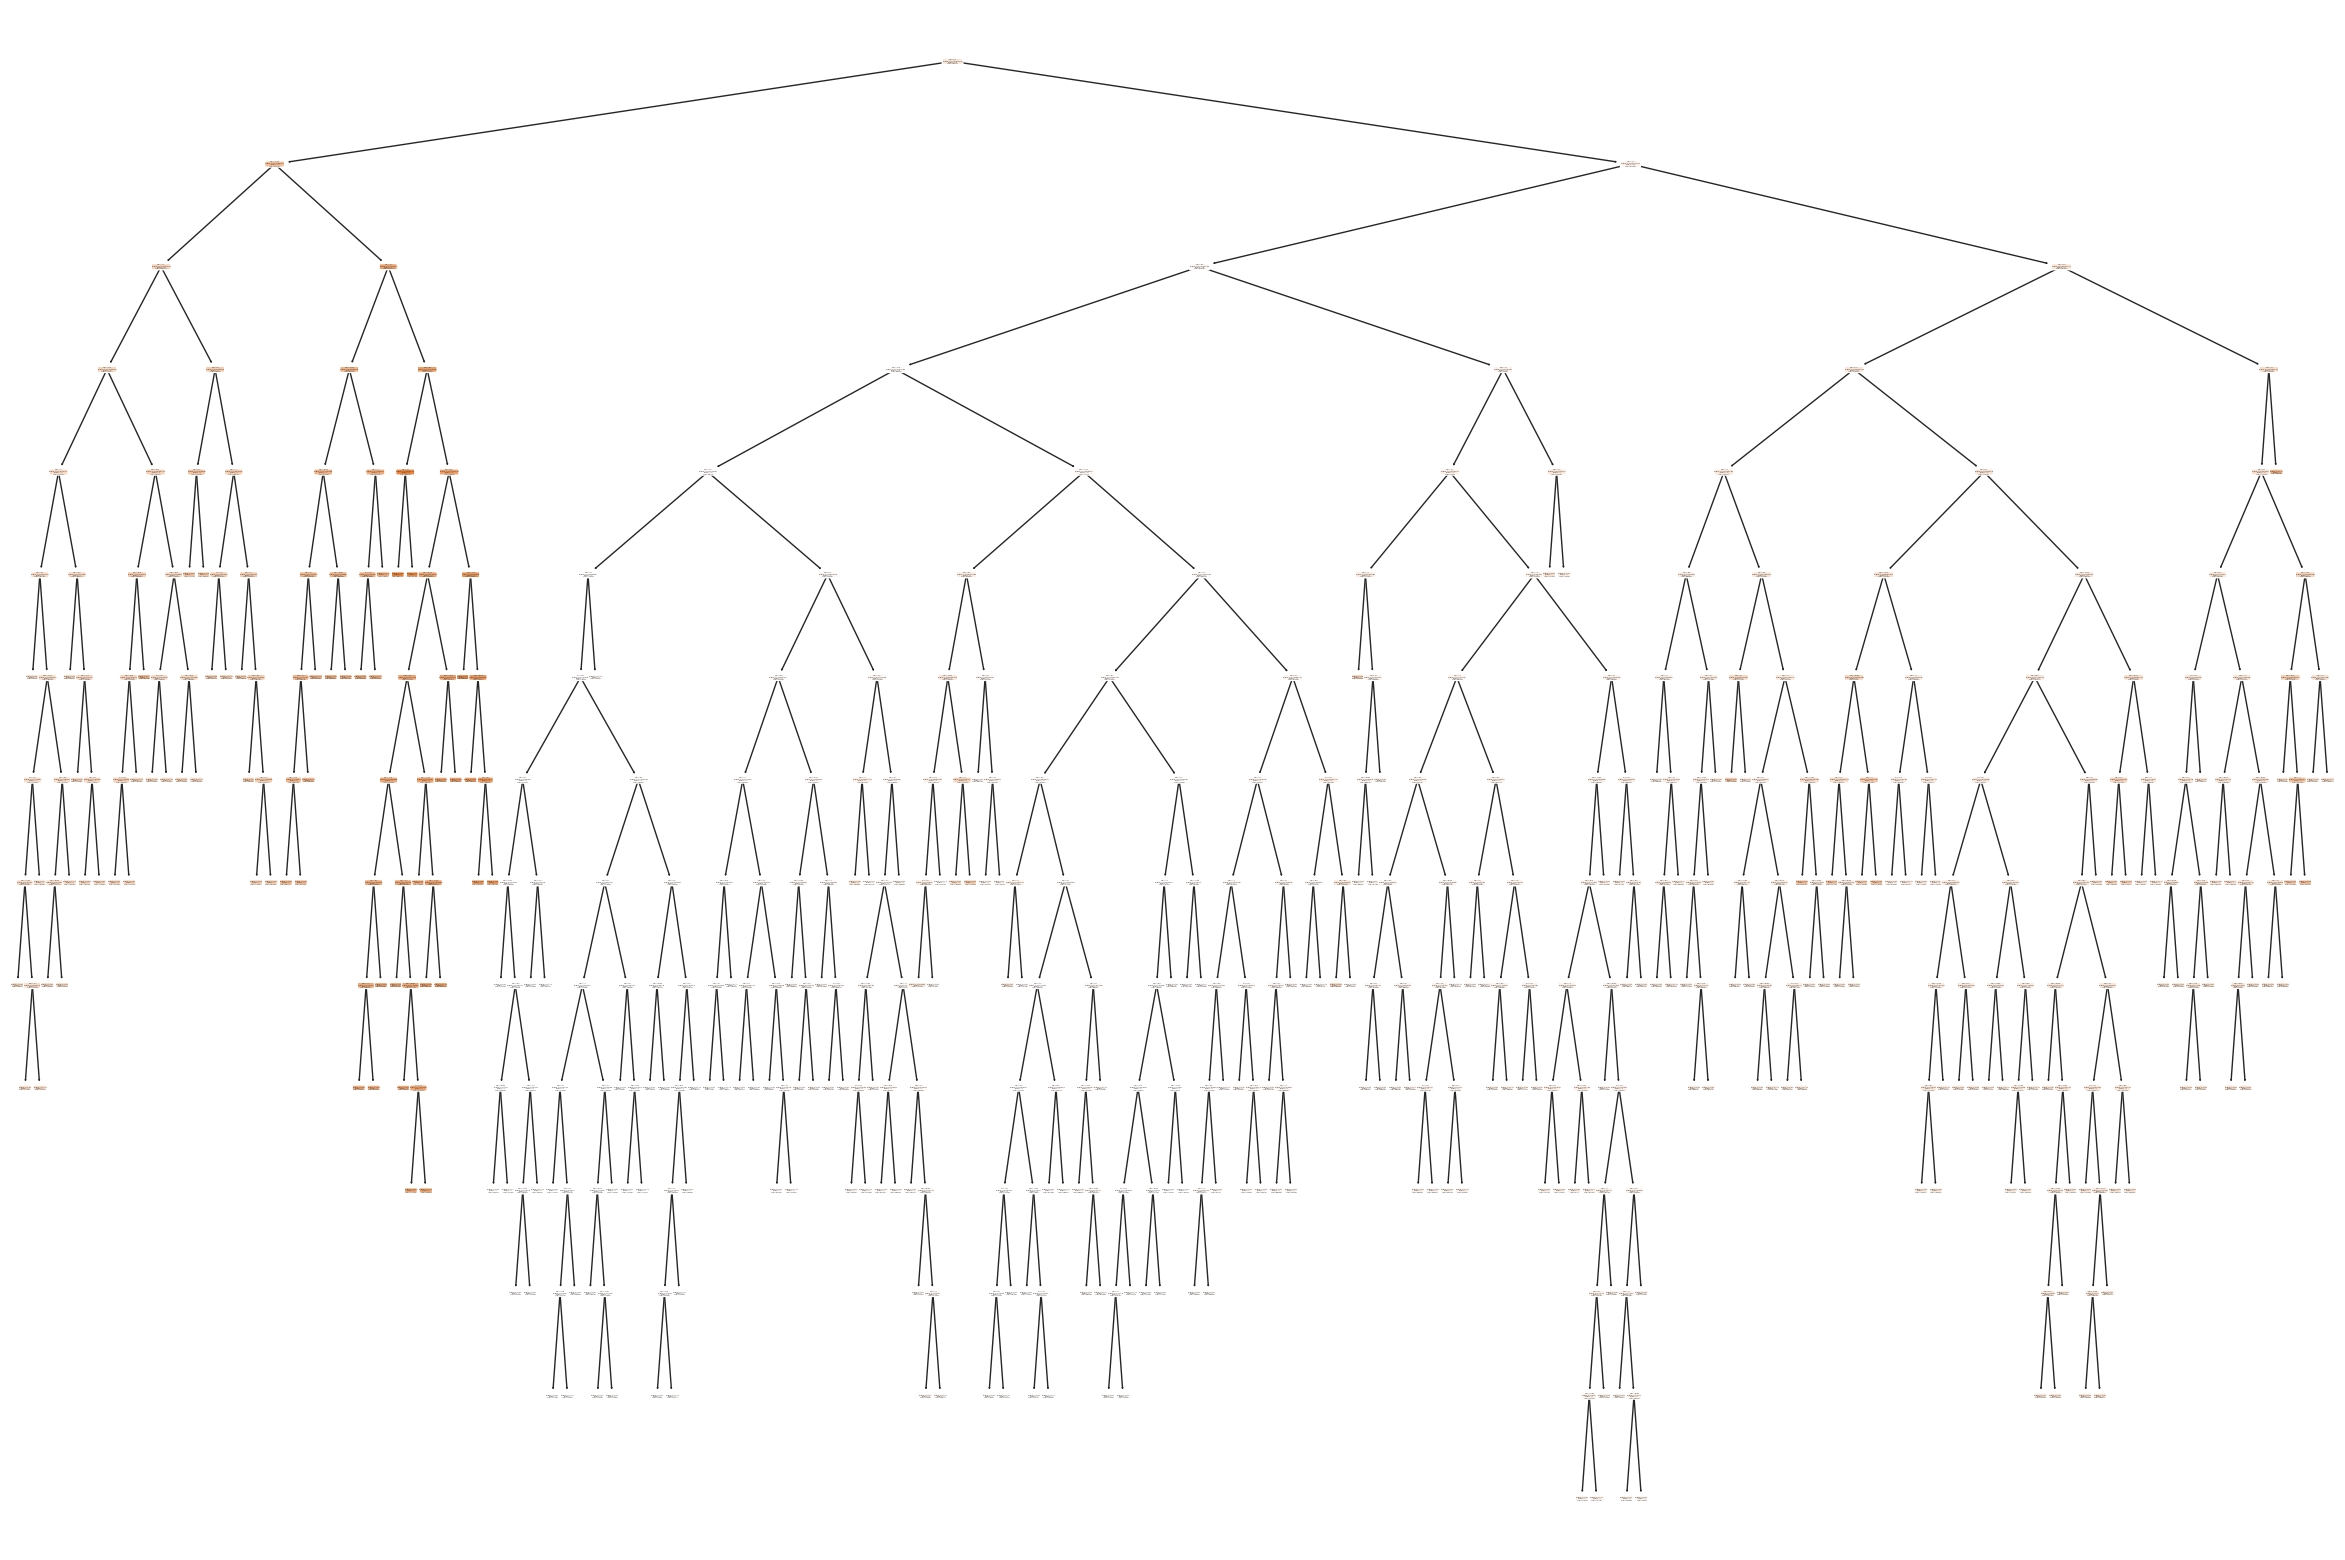

In [50]:
plt.figure(figsize=(30,20))
tree.plot_tree(regressor1,rounded=True , filled=True)
plt.show()

In [51]:
# Create an instance of the DecisionTreeRegressor class
model1 = DecisionTreeRegressor()

# Fit the model to your data
model1.fit(X, Y)


DecisionTreeRegressor()

In [52]:
model1.score(X,Y)

0.998667156135576

In [53]:
pred = model1.predict([[31,0,25.74,0,1,0]])

print('the cost is' , pred)

the cost is [3756.6216]


c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [54]:
model1.predict([[19, 0, 27.900, 0, 0, 1]])


c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([16884.924])

In [55]:
#plotting in graph

In [56]:
# from sklearn.tree import export_graphviz
# import graphviz

# # Export the decision tree as a Graphviz object
# dot_data = export_graphviz(model1, out_file=None, feature_names=X.columns)

# # Display the decision tree in Jupyter Notebook
# graphviz.Source(dot_data)


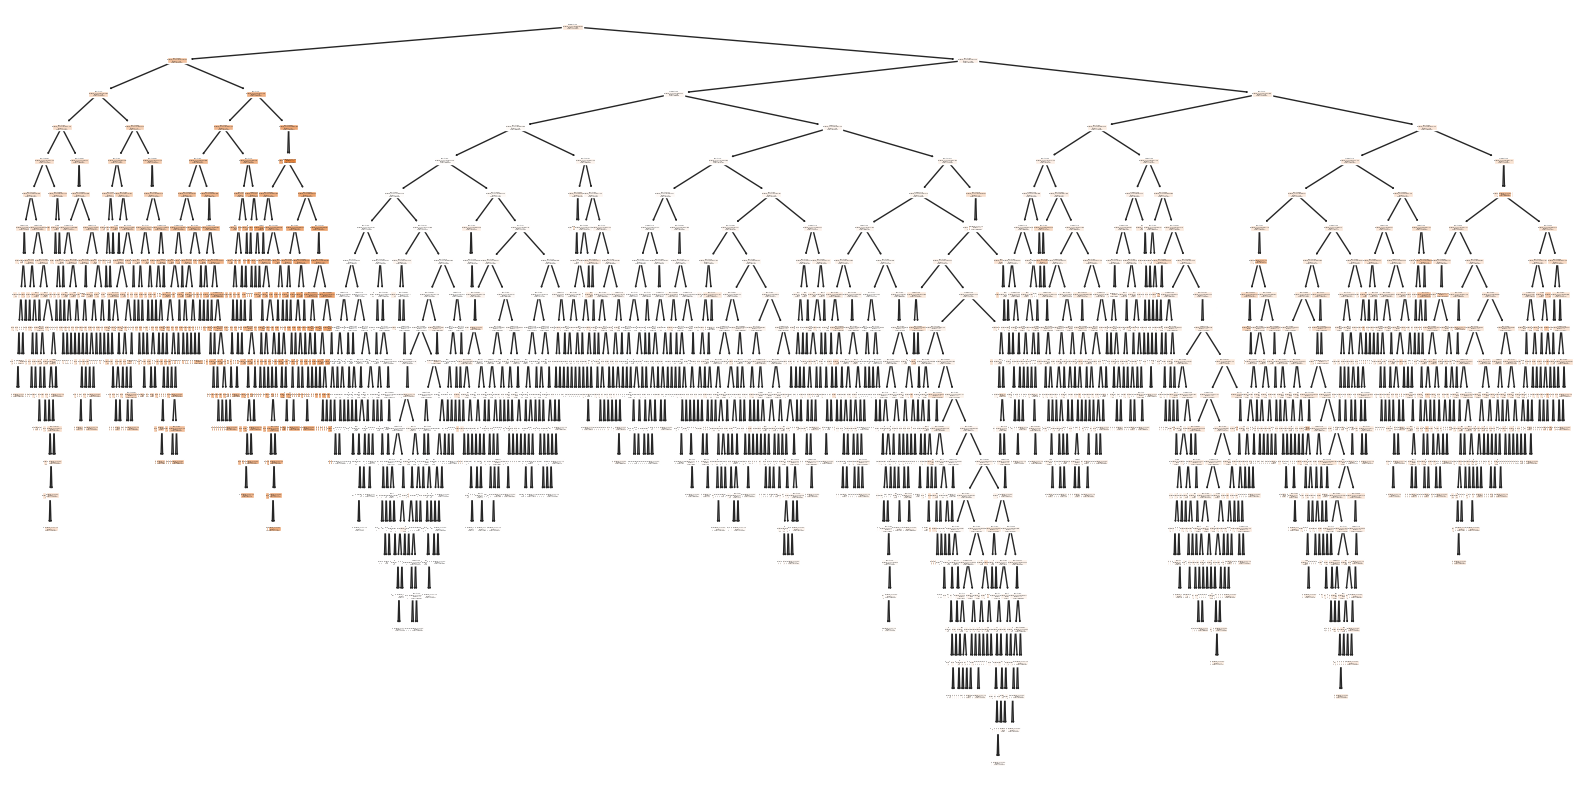

In [57]:
plt.figure(figsize=(20, 10))
# tree.plot_tree(model1, filled=True)
tree.plot_tree(model1, filled=True, feature_names=X.columns)
plt.show()


In [58]:
#pickle.dump(insurance_dataset,open('insurance.pkl','wb'))